# Networkx를 통한 Social Network Analysis
### 목차
- 데이터 로드
- 네트워크 시각화
- 중심성 계산하기
- 서브그래프 생성하기
- Appendix
    - 랜덤 그래프 생성하기
    - 노드/엣지 추가하기
    - 노드/엣지 속성 반영하기

## 1. 네트워크 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import sample
from collections import defaultdict

In [2]:
filename = "Social Network Dataset.xlsx"
network_data = pd.read_excel(filename, sheet_name=['Elements', 'Connections']) # dict타입

In [3]:
# edge list
connections_data = network_data['Connections'] 

edge_cols = ['Type', 'Weight', 'When']

graph = nx.convert_matrix.from_pandas_edgelist(connections_data,
                                               source='From',
                                               target='To',
                                               edge_attr=edge_cols)

In [4]:
# node list
elements_data = network_data['Elements'] 

node_dict = elements_data.set_index('Label').to_dict(orient='index')

nx.set_node_attributes(graph, node_dict)

In [5]:
print("노드 개수: ", len(graph.nodes))
print("엣지 개수: ", len(graph.edges))

노드 개수:  1193
엣지 개수:  2947


## 2. 네트워크 시각화

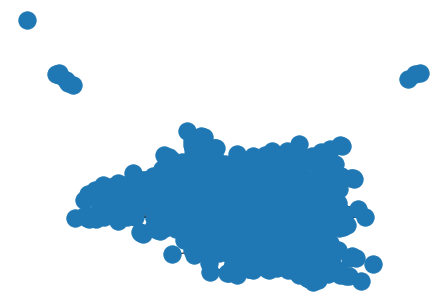

In [6]:
nx.draw(graph)

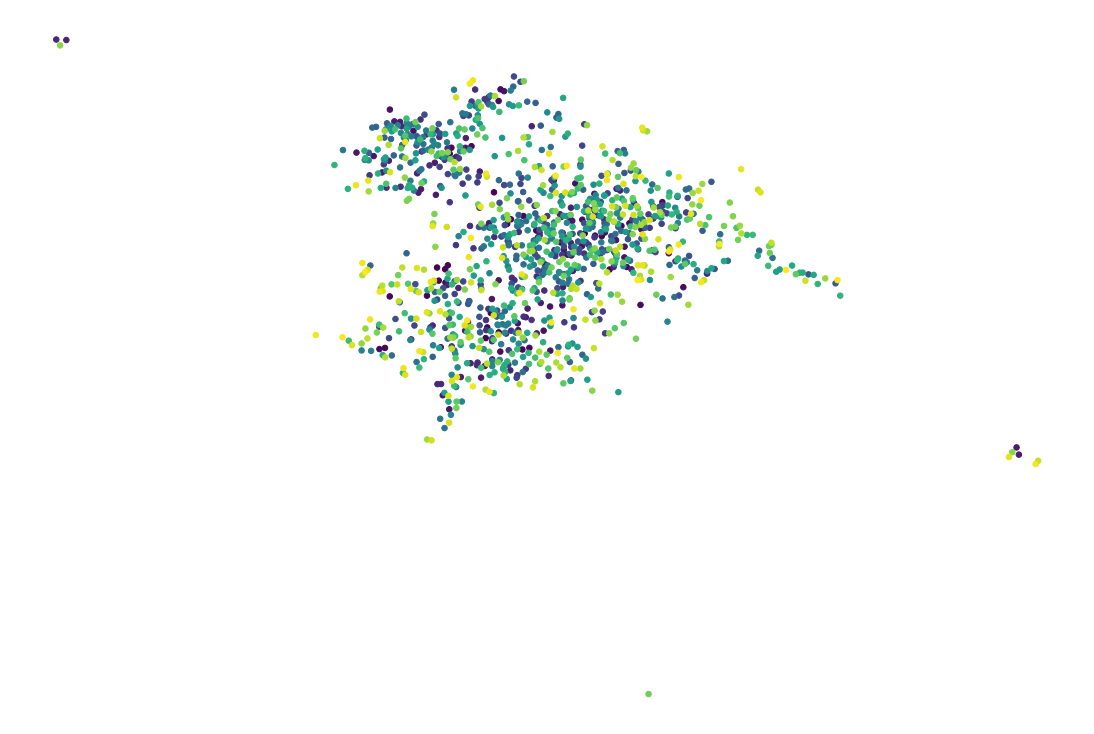

In [7]:
fig = plt.figure(figsize=(15, 10))

colors = np.linspace(0, 1, len(graph.nodes)) # 노드 랜덤색

nx.draw(graph, 
        node_size=30,
        node_color=colors,
        edge_color='white')

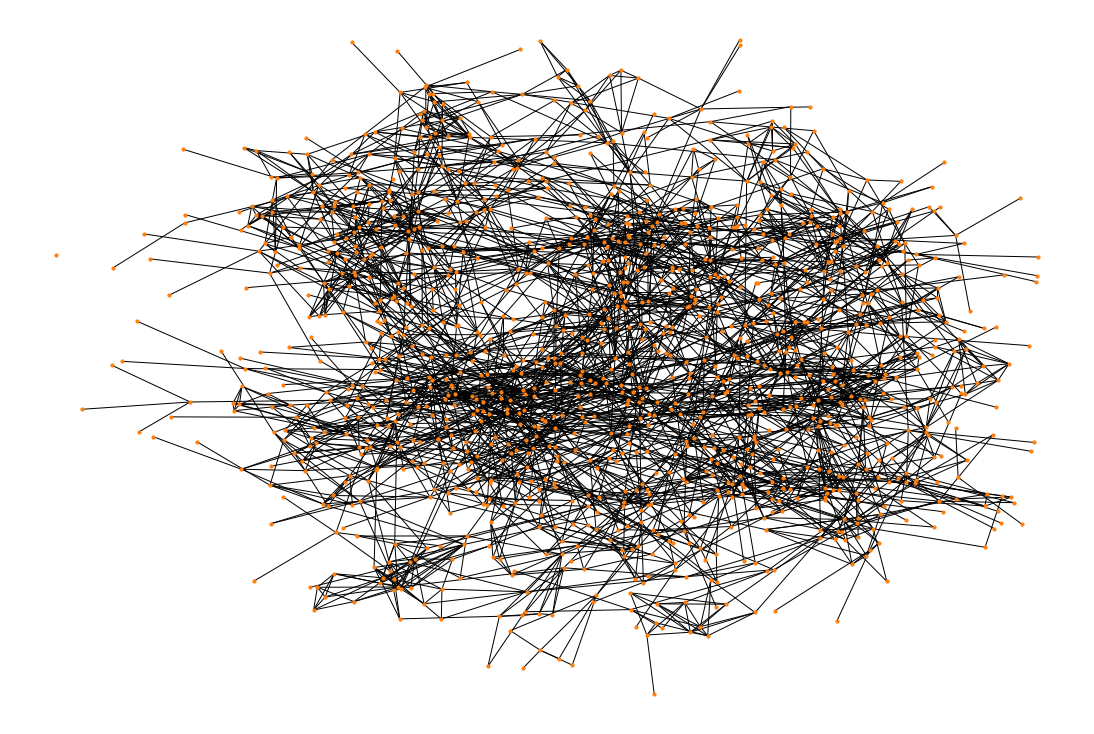

In [8]:
plt.figure(figsize=(15, 10))

k = 0.1
layout = nx.spring_layout(graph,
                          k=k)
nx.draw(graph,
        node_size=10,
        node_color='C1',
        pos=layout)

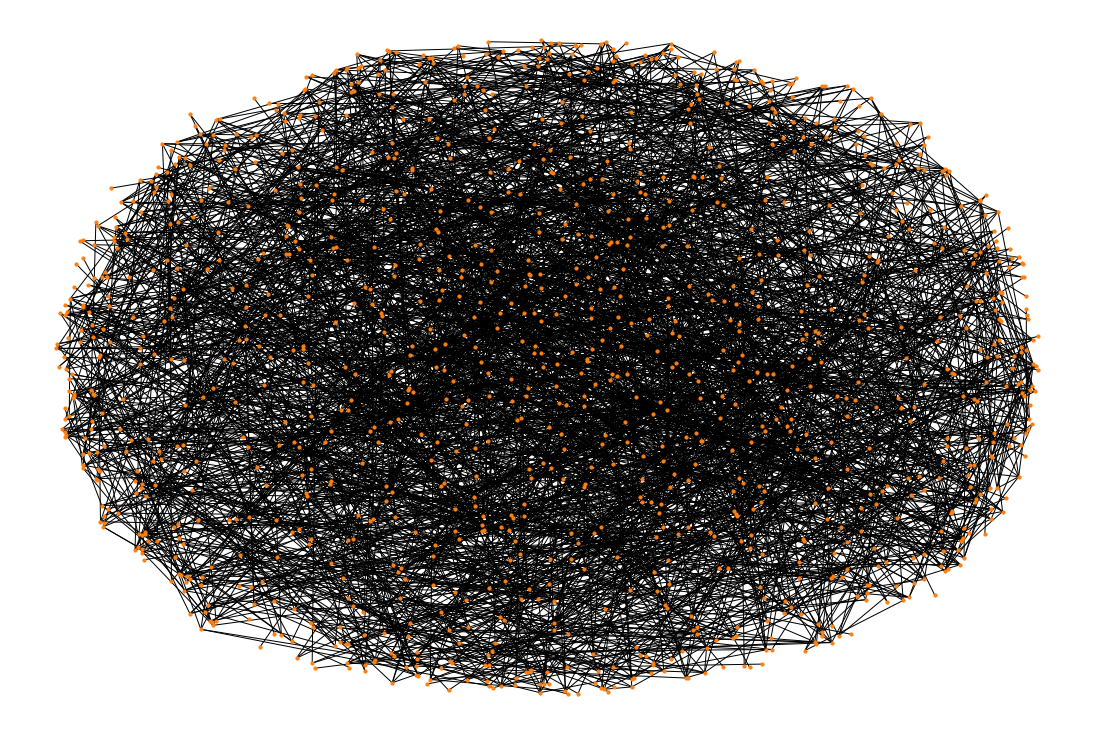

In [9]:
plt.figure(figsize=(15, 10))
k = 0.5 # 레이아웃 세기 
layout = nx.spring_layout(graph,
                          k=k)
nx.draw(graph,
        node_size=10,
        node_color='C1',
        pos=layout)

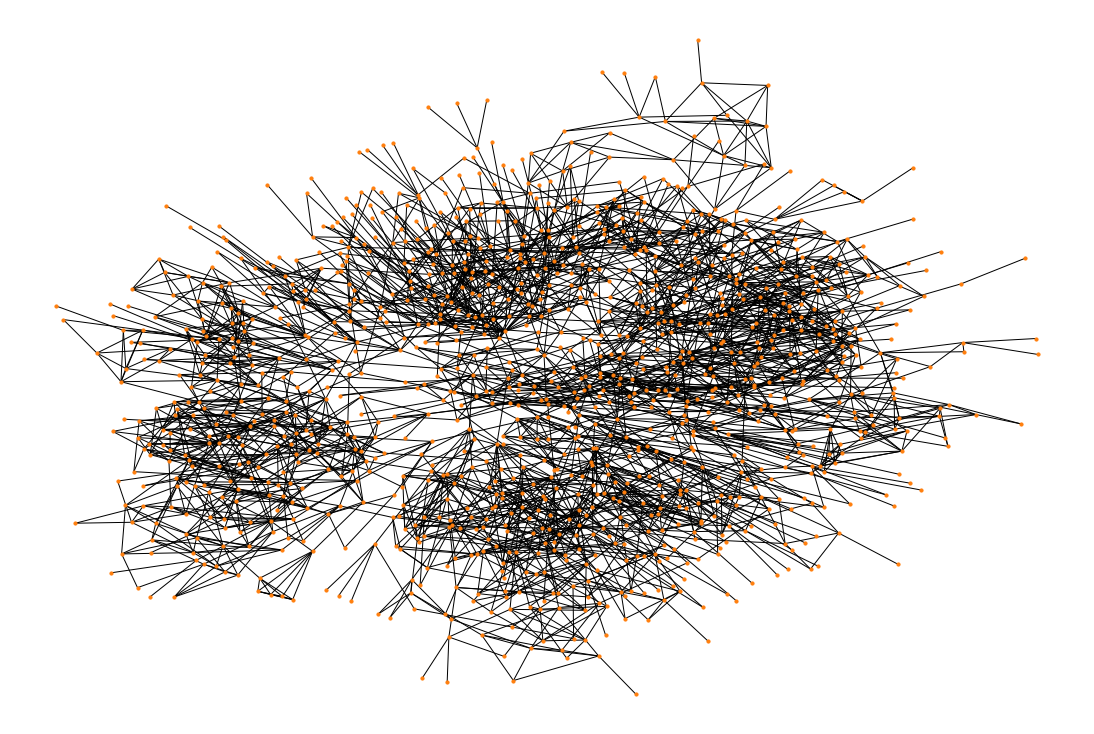

In [10]:
plt.figure(figsize=(15, 10))

layout = nx.kamada_kawai_layout(graph)

nx.draw(graph,
        node_size=10,
        node_color='C1',
        pos=layout)

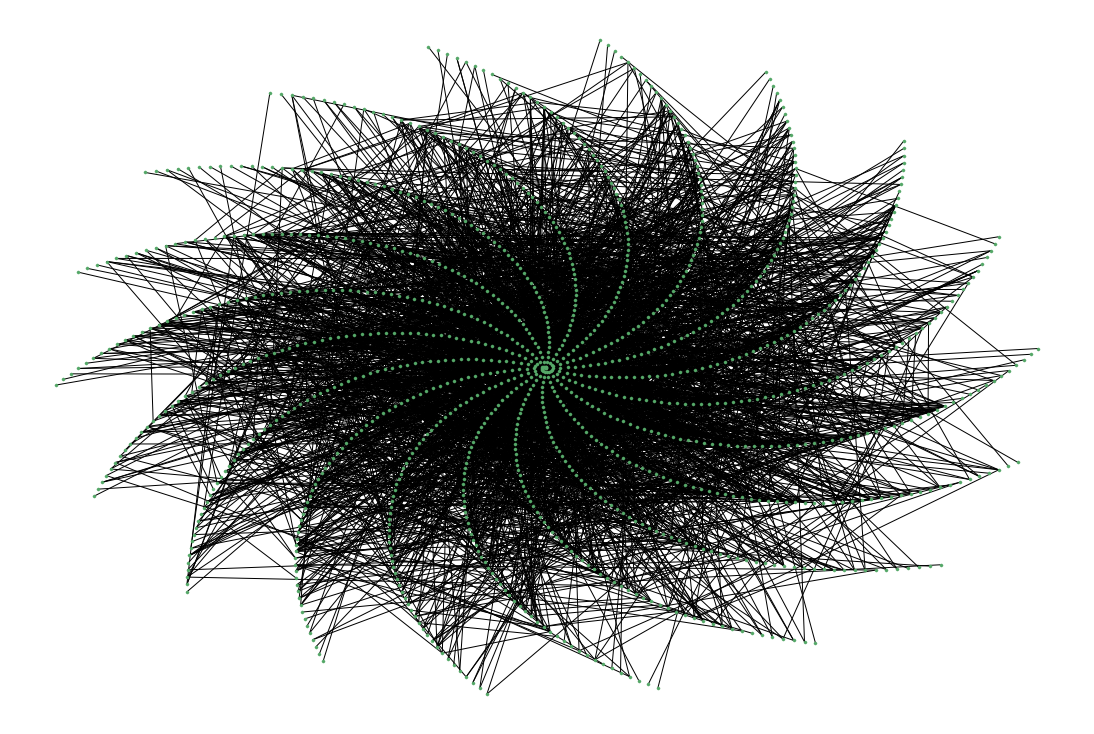

In [11]:
plt.figure(figsize=(15, 10))
plt.style.use('seaborn')
layout = nx.spiral_layout(graph)

nx.draw(graph,
        node_size=10,
        node_color='C1',
        pos=layout)


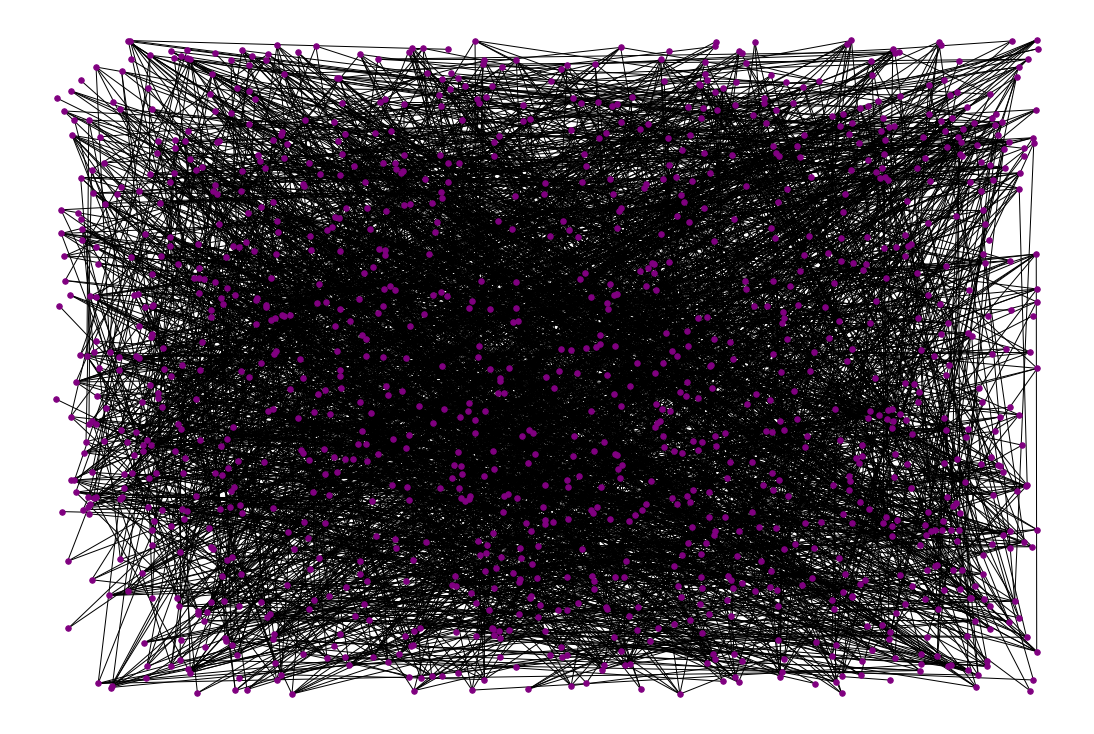

In [12]:
plt.figure(figsize=(15, 10))
plt.style.use('default')
layout = nx.random_layout(graph)

nx.draw(graph,
        node_size=30,
        node_color='purple',
        edge_color='black',
        pos=layout)

## 3. 중심성 계산하기

### 1) 연결중심성

In [13]:
centrality = nx.degree_centrality(graph)
sample(centrality.items(), 10)

[('S-17d15e', 0.0041946308724832215),
 ('S-398cb7', 0.0041946308724832215),
 ('S-087f53', 0.0008389261744966443),
 ('S-ee44cb', 0.0050335570469798654),
 ('S-5c2edd', 0.007550335570469798),
 ('S-11b3b8', 0.0008389261744966443),
 ('S-2dd09e', 0.0016778523489932886),
 ('S-a06547', 0.008389261744966443),
 ('S-c81d5b', 0.00587248322147651),
 ('S-ad3a1d', 0.0050335570469798654)]

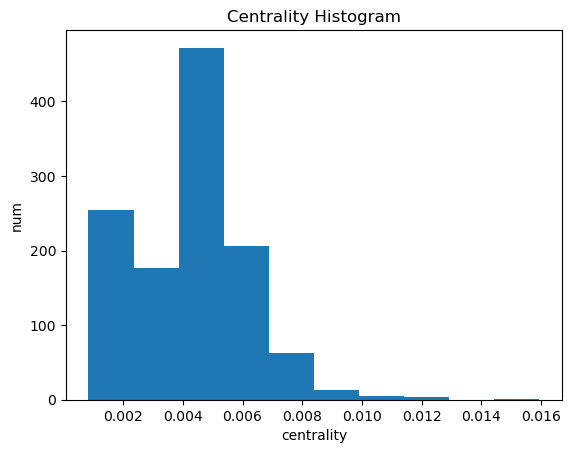

In [14]:
plt.hist(centrality.values())
plt.title('Centrality Histogram')
plt.xlabel('centrality')
plt.ylabel('num')
plt.show()

### 2) 근접 중심성

In [15]:
centrality = nx.closeness_centrality(graph)
sample(centrality.items(), 10)

[('S-f583e0', 0.14936713299572443),
 ('S-ea42ca', 0.15011320346022666),
 ('S-ff18b1', 0.1192475218859955),
 ('S-2a8ba5', 0.15675857865687437),
 ('S-28c5f4', 0.14887385909023876),
 ('S-ad3a1d', 0.17266999007328368),
 ('S-59ca27', 0.17979504411987263),
 ('S-ff80cd', 0.1231180559472111),
 ('S-b5d694', 0.12854616062924432),
 ('S-c818a6', 0.13116426730275846)]

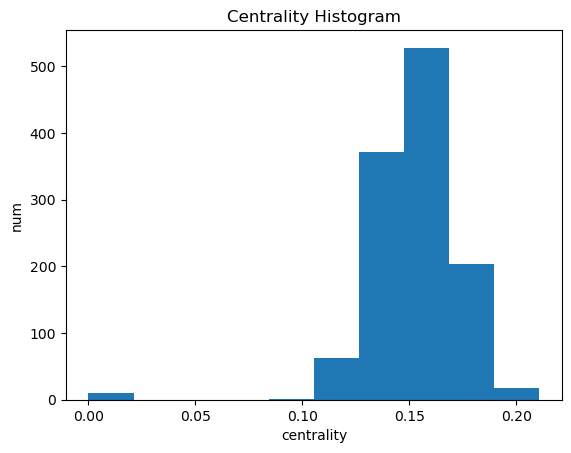

In [16]:
plt.hist(centrality.values())
plt.title('Centrality Histogram')
plt.xlabel('centrality')
plt.ylabel('num')
plt.show()

### 3) 매개중심성

In [17]:
centrality = nx.betweenness_centrality(graph)
sample(centrality.items(), 10)

[('S-b83a78', 0.0017650313625960329),
 ('S-70c5e5', 0.00870535705124638),
 ('S-acbe96', 0.0042925590884537864),
 ('S-68606d', 0.00985618722125304),
 ('S-b17ae3', 0.005963170934476225),
 ('S-5e5aa0', 0.0),
 ('S-c628d6', 0.0014802342605638348),
 ('S-484cfd', 0.0),
 ('S-92626d', 0.0),
 ('S-19edc6', 0.003423113344553374)]

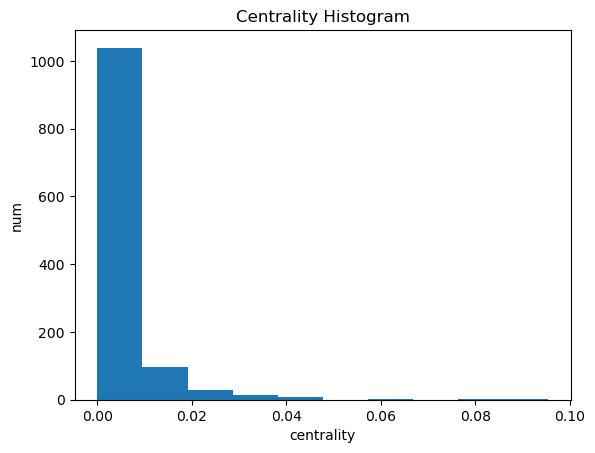

In [18]:
plt.hist(centrality.values())
plt.title('Centrality Histogram')
plt.xlabel('centrality')
plt.ylabel('num')
plt.show()

## 4. 서브그래프 생성하기

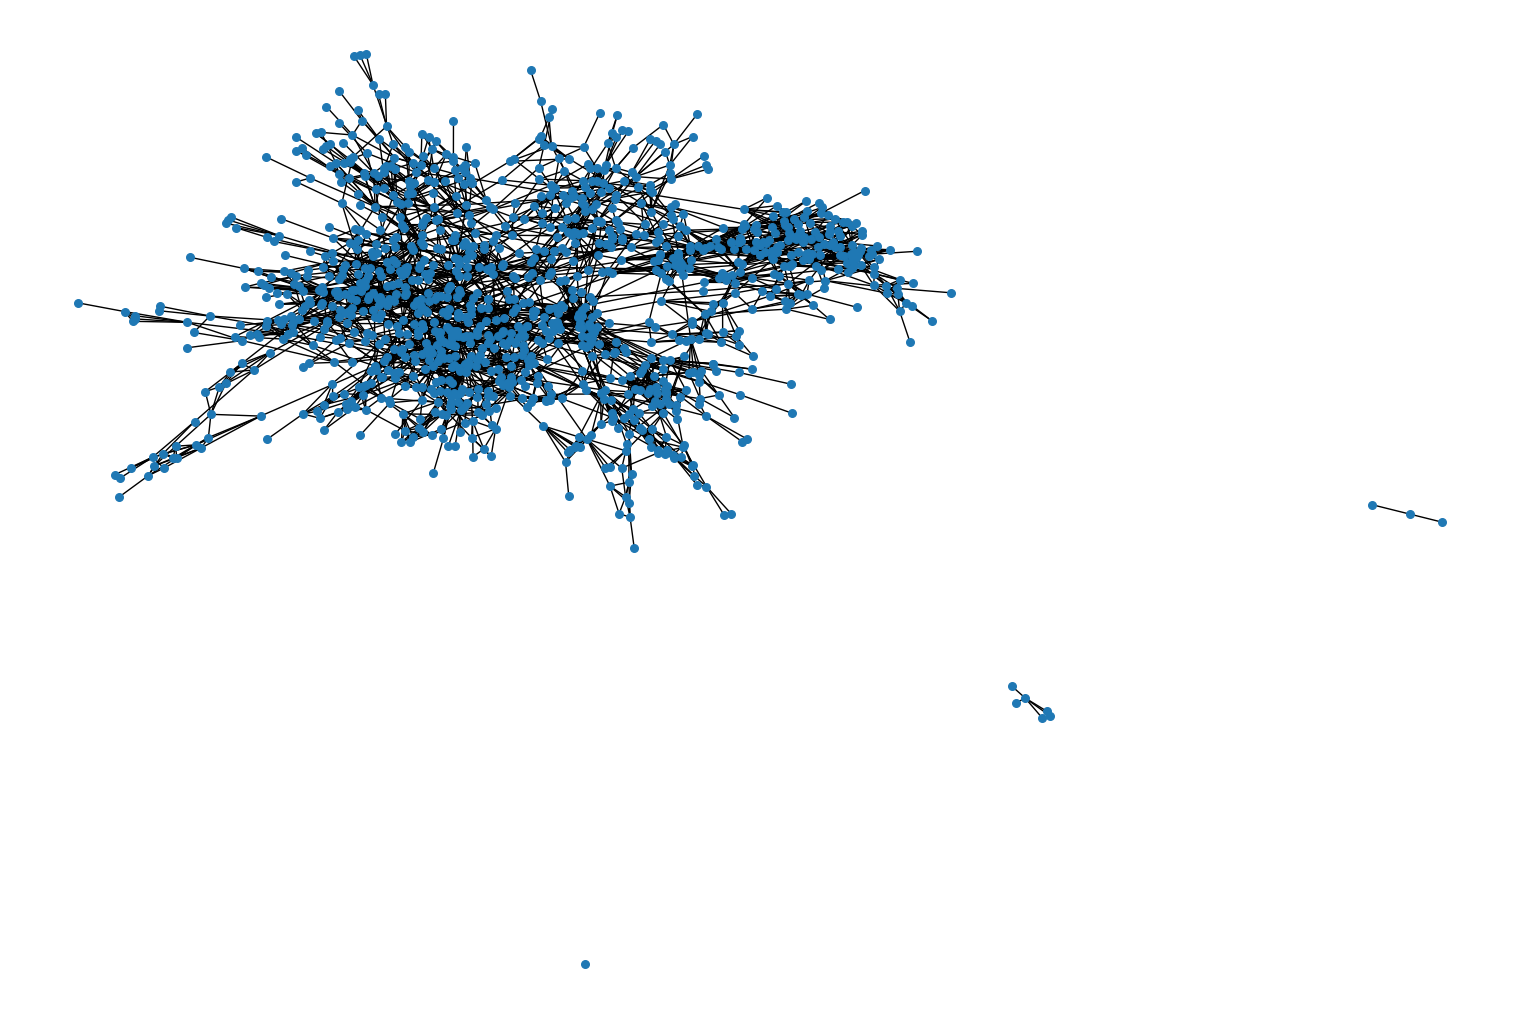

In [20]:
fig = plt.figure(figsize=(15, 10))
nx.draw(graph, 
        node_size=30,
        edge_color='black')

In [21]:
node = sample(graph.nodes, 1)[0]
graph.nodes[node]

{'Type': 'Student', 'School (ID)': 25, 'Answered the form': 'Yes'}

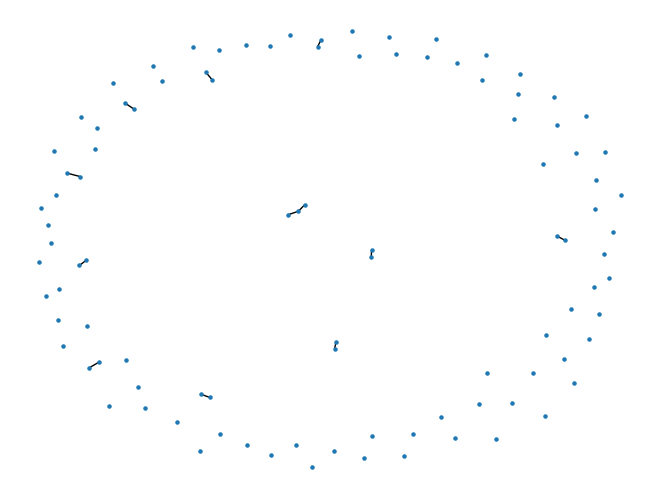

In [22]:
sampled_nodes = sample(graph.nodes, 100)
subgraph = graph.subgraph(sampled_nodes)
nx.draw(subgraph,
        node_size=5,
        with_labels=False)

In [23]:
nodes_school_id = nx.get_node_attributes(graph,
                                         'School (ID)')
school_nodes = defaultdict(list)
for node, school_id in nodes_school_id.items():
    school_nodes[school_id].append(node)

In [24]:
school_nodes[5]

['S-82d78a', 'S-087f53']

In [25]:
graph.nodes['S-087f53']

{'Type': 'Student', 'School (ID)': 5, 'Answered the form': 'No'}

In [26]:
subgraphs = {}
for school_id, nodes in school_nodes.items():
    subgraph = graph.subgraph(nodes)
    subgraphs[school_id] = subgraph

In [27]:
subgraphs[5].nodes

NodeView(('S-82d78a', 'S-087f53'))

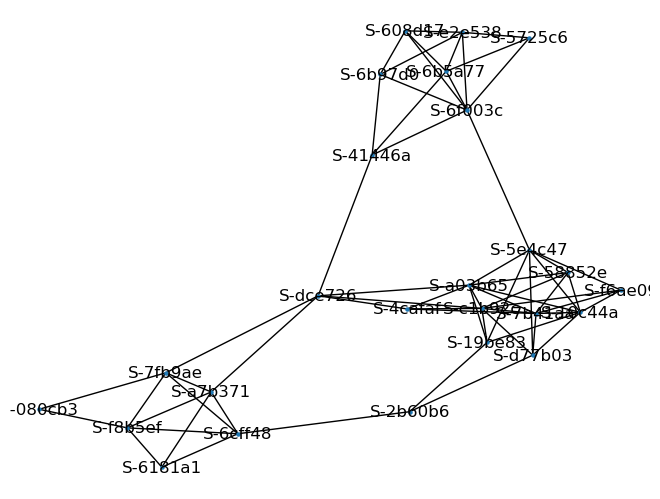

In [28]:
nx.draw(subgraphs[3],
        node_size=5,
        with_labels=True)

## 5. Appendix 
### 1) 랜덤 그래프 생성하기

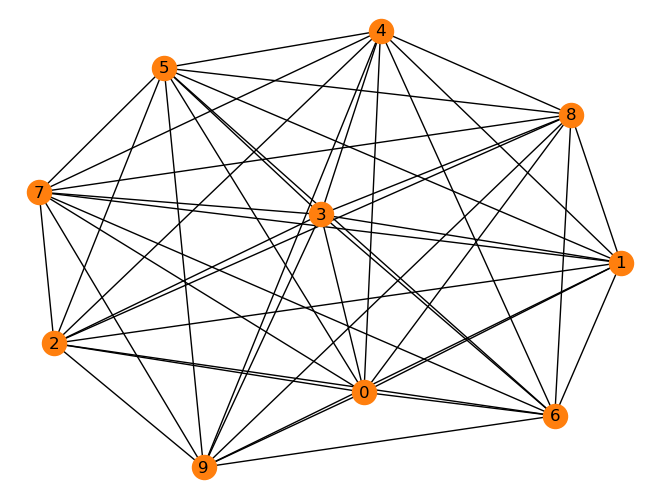

In [29]:
graph = nx.complete_graph(10)
nx.draw(graph, 
        node_color='C1',
        with_labels=True)

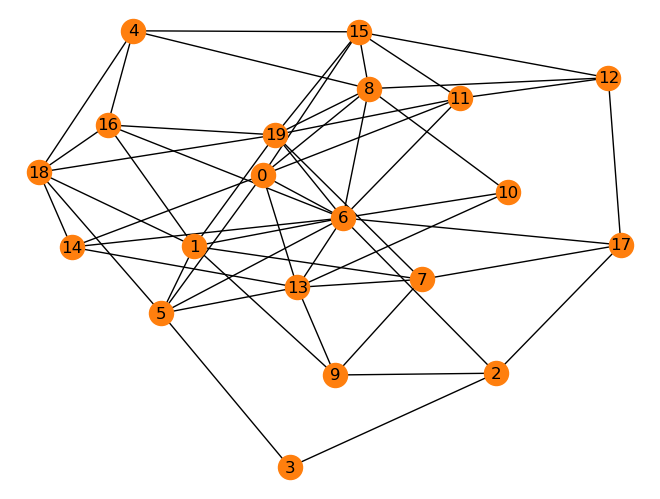

In [30]:
graph = nx.binomial_graph(20, 0.3)
nx.draw(graph, 
        node_color='C1',
        with_labels=True)

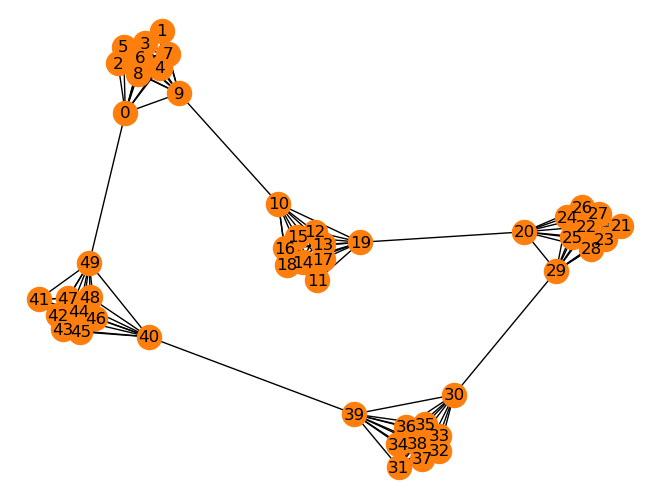

In [31]:
graph = nx.connected_caveman_graph(5, 10)
nx.draw(graph, 
        node_color='C1',
        with_labels=True)

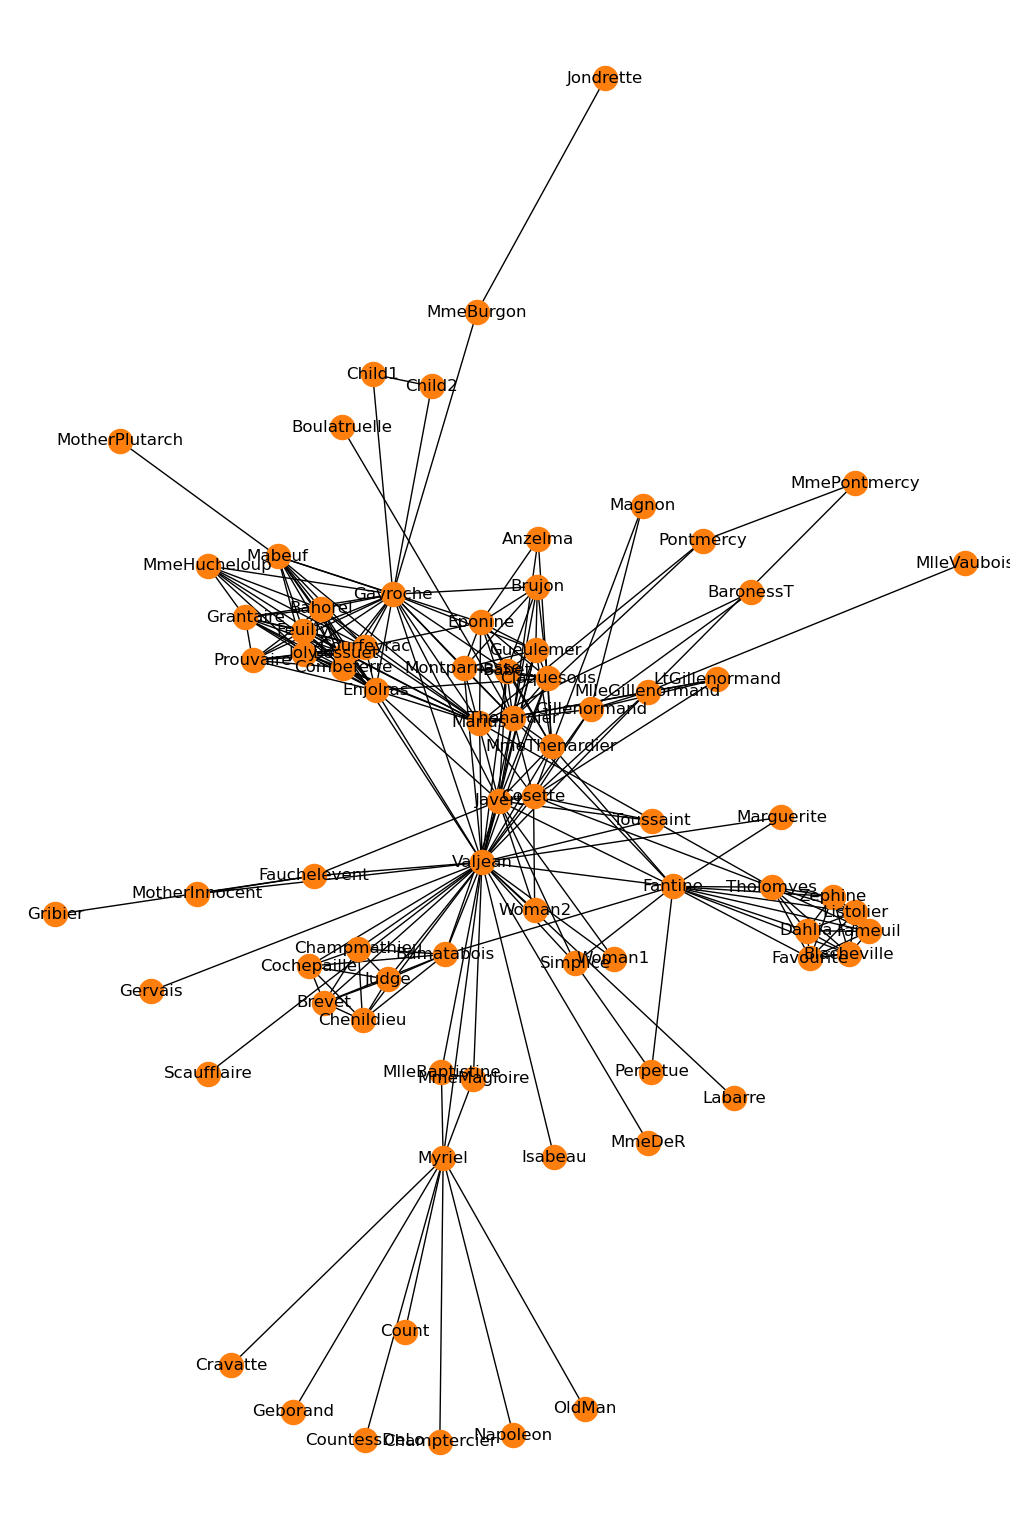

In [32]:
plt.figure(figsize=(10, 15))
graph = nx.les_miserables_graph()
nx.draw(graph, 
        node_color='C1',
        with_labels=True)

### 2) 노드/엣지 추가하기

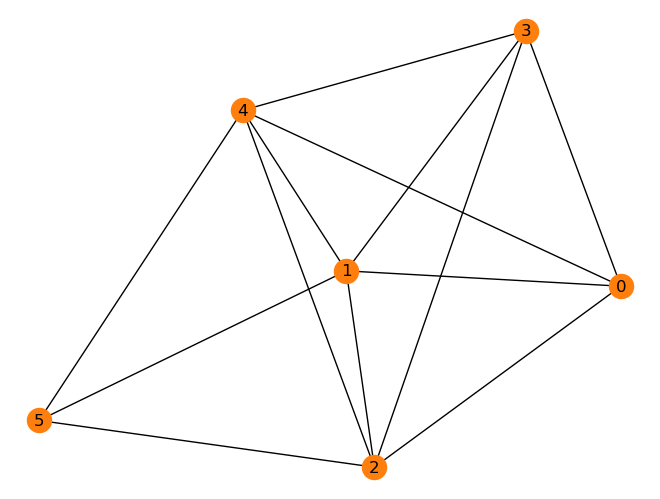

In [33]:
graph = nx.random_internet_as_graph(5)
nx.draw(graph,
        node_color='C1',
        with_labels=True)

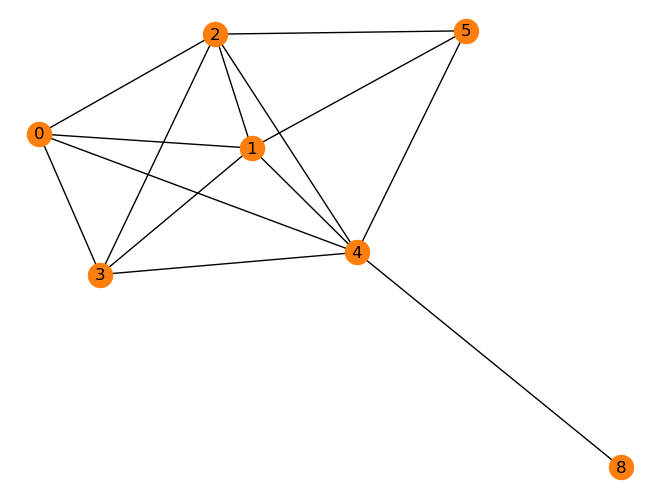

In [34]:
graph.add_edge(4, 8)
nx.draw(graph,
        node_color='C1',
        with_labels=True)

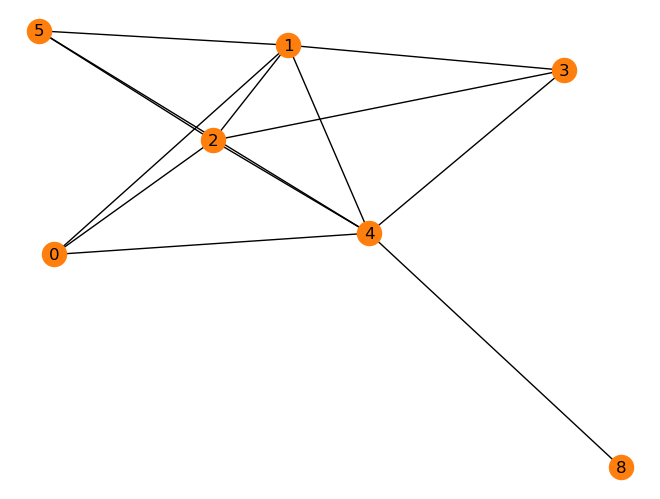

In [35]:
graph.remove_edge(0, 3)
nx.draw(graph,
        node_color='C1',
        with_labels=True)

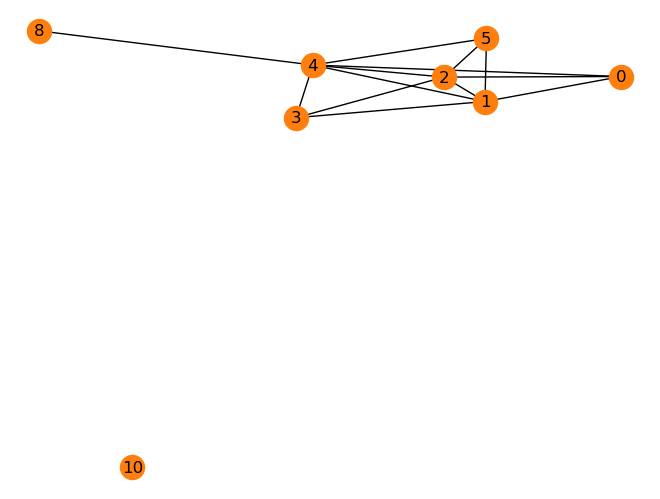

In [36]:
graph.add_node(10)
nx.draw(graph,
        node_color='C1',
        with_labels=True)

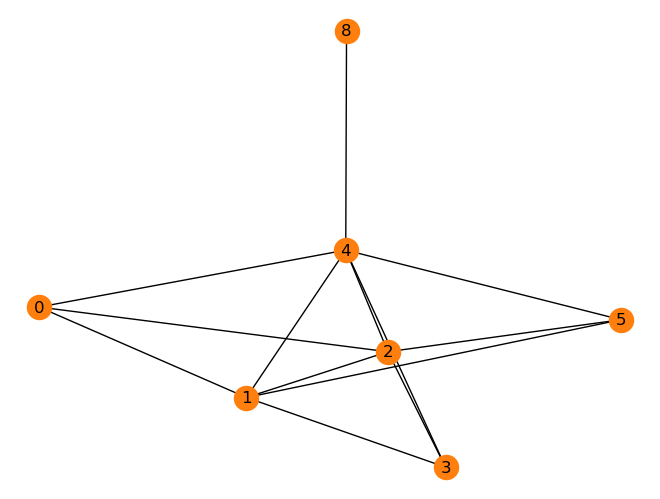

In [37]:
graph.remove_node(10)
nx.draw(graph,
        node_color='C1',
        with_labels=True)

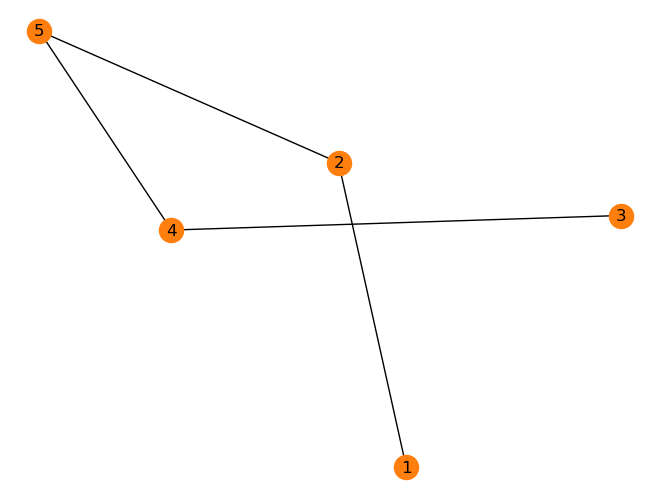

In [38]:
graph = nx.Graph()
new_nodes = [1,2,3,4,5]
new_edges = [(1,2),
             (2,5),
             (3,4),
             (4,5)]
graph.add_nodes_from(new_nodes)
graph.add_edges_from(new_edges)

nx.draw(graph,
        node_color='C1',
        with_labels=True)

### 3) 노드/엣지 속성 반영하기

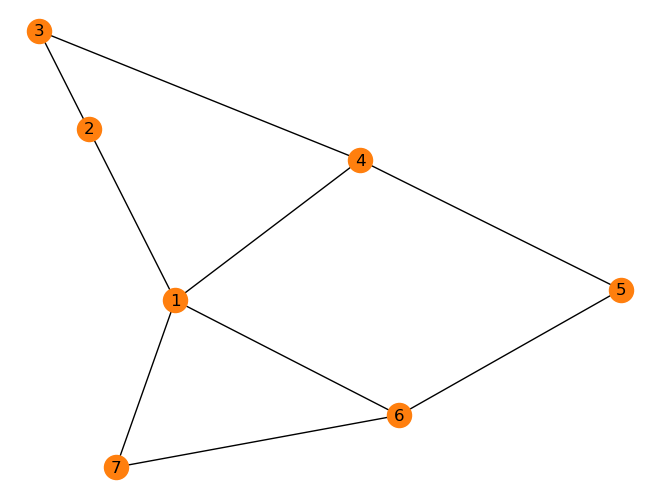

In [39]:
graph = nx.Graph()
edges = [(1, 2), (2, 3), (3, 4),
         (4, 5), (5, 6), (6, 1),
         (1, 4), (1, 7), (6, 7)]
graph.add_edges_from(edges)
nx.draw(graph, 
        node_color='C1',
        with_labels=True)

In [40]:
print(graph.nodes[1])

graph.nodes[1]['category'] = 'A'
print(graph.nodes[1])

{}
{'category': 'A'}


In [41]:
print(graph.edges[1, 2])

graph.edges[1, 2]['weight'] = 2
print(graph.edges[1, 2])

{}
{'weight': 2}


In [42]:
edge_weights = {edge: np.random.rand()
                for edge in graph.edges}

nx.set_edge_attributes(graph, edge_weights, 'weight')
graph.edges[3, 4]

{'weight': 0.18211648712676953}

In [43]:
node_sizes = {node: np.random.rand() * 300
              for node in graph.nodes}

nx.set_node_attributes(graph, node_sizes, 'size')
graph.nodes[5]

{'size': 114.47119870056349}

In [44]:
node_colors = {node: np.random.rand()
              for node in graph.nodes}

nx.set_node_attributes(graph, node_colors, 'color')

In [45]:
node_colors

{1: 0.009396357037088632,
 2: 0.006791503207172367,
 3: 0.9598566756329718,
 4: 0.9874006401139541,
 5: 0.9493953713987625,
 6: 0.416838069837707,
 7: 0.9865519858349302}

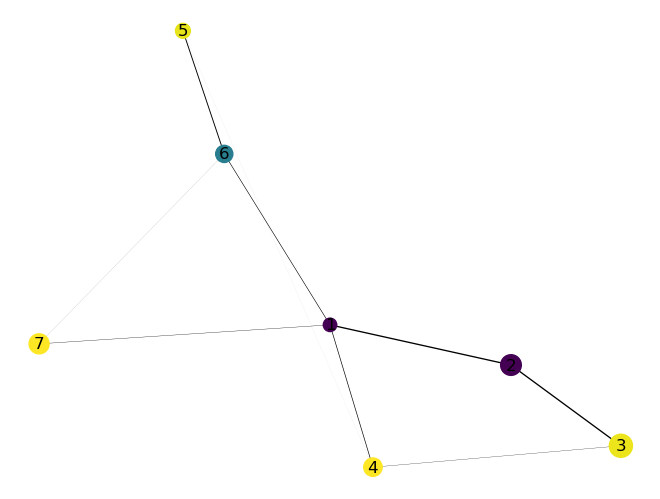

In [46]:
width = list(nx.get_edge_attributes(graph, 'weight').values())
node_size = list(nx.get_node_attributes(graph, 'size').values())
node_color = list(nx.get_node_attributes(graph, 'color').values())

nx.draw(graph, 
        width=width,
        node_size=node_size,
        node_color=node_color,
        with_labels=True)

In [47]:
nx.get_node_attributes(graph, 'size')

{1: 93.49684546940202,
 2: 221.04002990973206,
 3: 276.45343974882115,
 4: 175.74638550041618,
 5: 114.47119870056349,
 6: 152.60913610660066,
 7: 207.8761341754794}

In [48]:
nx.get_edge_attributes(graph, 'weight')

{(1, 2): 0.9464426683149415,
 (1, 6): 0.4282244757137049,
 (1, 4): 0.4719558903818746,
 (1, 7): 0.23031916423389964,
 (2, 3): 0.945562856908897,
 (3, 4): 0.18211648712676953,
 (4, 5): 0.01542287878663462,
 (5, 6): 0.6665100987134637,
 (6, 7): 0.05039126076868372}